# Text Processing

## Capturing Text Data

### Plain Text

In [2]:
import os

with open(os.path.join('genesis.txt'), 'r') as f:
    text = f.read()
    print(text)

In the beginning God created the heaven and the earth. 
And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters. 
And God said, Let there be light: and there was light. 
And God saw the light, that it was good: and God divided the light from the darkness. 
And God called the light Day, and the darkness he called Night. And the evening and the morning were the first day. 
And God said, Let there be a firmament in the midst of the waters, and let it divide the waters from the waters. 
And God made the firmament, and divided the waters which were under the firmament from the waters which were above the firmament: and it was so. 
And God called the firmament Heaven. And the evening and the morning were the second day. 
And God said, Let the waters under the heaven be gathered together unto one place, and let the dry land appear: and it was so. 
And God called the dry land Earth; and the gathering together

### Tabular Data

In [5]:
import pandas as pd

df = pd.read_csv('Consumer_Complaints.csv', encoding = "ISO-8859-1")
df.head()[['Product', 'Consumer complaint narrative']]

,Product,Consumer complaint narrative
0,Mortgage,NaN
1,Credit reporting,I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
3,Credit card,NaN
4,Debt collection,NaN


In [6]:
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.head()[['Product', 'Consumer complaint narrative']]

,Product,Consumer complaint narrative
1,Credit reporting,I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
7,Credit reporting,An account on my credit report has a mistaken ...
12,Debt collection,This company refuses to provide me verificatio...
16,Debt collection,This complaint is in regards to Square Two Fin...


In [8]:
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].str.lower()
df.head()[['Product', 'Consumer complaint narrative']]

,Product,Consumer complaint narrative
1,Credit reporting,i have outdated information on my credit repor...
2,Consumer Loan,i purchased a new car on xxxx xxxx. the car de...
7,Credit reporting,an account on my credit report has a mistaken ...
12,Debt collection,this company refuses to provide me verificatio...
16,Debt collection,this complaint is in regards to square two fin...


In [29]:
import re

df['Consumer complaint narrative'] = df['Consumer complaint narrative'].str.replace('x', '')
df.head()[['Product', 'Consumer complaint narrative']]

,Product,Consumer complaint narrative
1,Credit reporting,i have outdated information on my credit repor...
2,Consumer Loan,i purchased a new car on . the car dealer cal...
7,Credit reporting,an account on my credit report has a mistaken ...
12,Debt collection,this company refuses to provide me verificatio...
16,Debt collection,this complaint is in regards to square two fin...


### Online Resource

In [36]:
import requests
import json

r = requests.get("https://quotes.rest/qod.json")
res = r.json()
print(json.dumps(res, indent = 4))

{
    "success": {
        "total": 1
    },
    "contents": {
        "quotes": [
            {
                "quote": "The real winners in life are the people who look at every situation with an expectation that they can make it work or make it better",
                "author": "Barbara Pletcher",
                "length": "132",
                "tags": [
                    "inspire",
                    "winning"
                ],
                "category": "inspire",
                "title": "Inspiring Quote of the day",
                "date": "2018-05-10",
                "id": null
            }
        ],
        "copyright": "2017-19 theysaidso.com"
    }
}


In [39]:
res['contents']['quotes'][0]

{'author': 'Barbara Pletcher',
 'category': 'inspire',
 'date': '2018-05-10',
 'id': None,
 'length': '132',
 'quote': 'The real winners in life are the people who look at every situation with an expectation that they can make it work or make it better',
 'tags': ['inspire', 'winning'],
 'title': 'Inspiring Quote of the day'}

In [38]:
q = res['contents']['quotes'][0]
print(q['quote'], '\n--', q['author'])

The real winners in life are the people who look at every situation with an expectation that they can make it work or make it better 
-- Barbara Pletcher


## Normalization

### Case Normalization

In [44]:
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"
print(text)

The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?


In [45]:
text = text.lower()
print(text)

the first time you see the second renaissance it may look boring. look at it at least twice and definitely watch part 2. it will change your view of the matrix. are the human people the ones who started the war ? is ai a bad thing ?


### Punctuation Removal

In [46]:
text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
print(text)

the first time you see the second renaissance it may look boring  look at it at least twice and definitely watch part 2  it will change your view of the matrix  are the human people the ones who started the war   is ai a bad thing  


## Tokenization

In [47]:
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


## NLTK: Natural Language ToolKit

In [54]:
# Another sample text
text = "Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers."
print(text)

Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers.


In [55]:
from nltk.tokenize import word_tokenize

words = word_tokenize(text)
print(words)

['Dr.', 'Smith', 'graduated', 'from', 'the', 'University', 'of', 'Washington', '.', 'He', 'later', 'started', 'an', 'analytics', 'firm', 'called', 'Lux', ',', 'which', 'catered', 'to', 'enterprise', 'customers', '.']


In [56]:
from nltk.tokenize import sent_tokenize

# Split text into sentences
sentence = sent_tokenize(text)
print(sentence)

['Dr. Smith graduated from the University of Washington.', 'He later started an analytics firm called Lux, which catered to enterprise customers.']


In [57]:
# List stopwords
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [58]:
# Reset text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"

# Normalize it
text = re.sub(r'[^a-zA-Z0-9]', ' ', text.lower())

# Tokenize it
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


In [59]:
# Remove stop words

words = [w for w in words if w not in stopwords.words('english')]
print(words)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'ones', 'started', 'war', 'ai', 'bad', 'thing']


## Part-of-Speech Tagging

In [60]:
from nltk import pos_tag

# Tag parts of speech (PoS)
sentence = word_tokenize('I always lie down to tell a lie.')
pos_tag(sentence)

[('I', 'PRP'),
 ('always', 'RB'),
 ('lie', 'VBP'),
 ('down', 'RP'),
 ('to', 'TO'),
 ('tell', 'VB'),
 ('a', 'DT'),
 ('lie', 'NN'),
 ('.', '.')]

## Sentence Parsing

In [62]:
import nltk

# Define a custom grammar
my_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

parser = nltk.ChartParser(my_grammar)

# Parse a sentence
sentence = word_tokenize("I shot an elephant in my pajamas")
for tree in parser.parse(sentence):
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


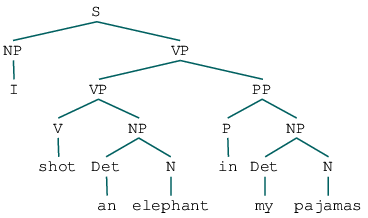

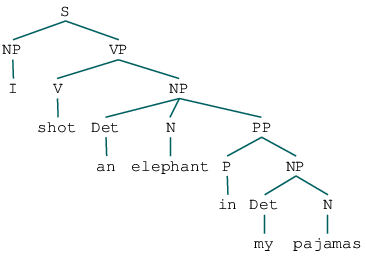

In [68]:
import IPython  # for displaying parse trees inline

# Visualize parse trees
for tree in parser.parse(sentence):
    IPython.display.display(tree)  # instead of tree.draw()

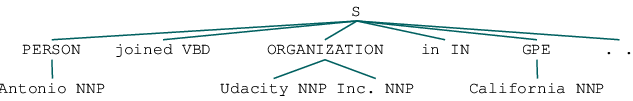

In [67]:
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize

# Recognize named entities in a tagged sentence
tree = ne_chunk(pos_tag(word_tokenize("Antonio joined Udacity Inc. in California.")))
IPython.display.display(tree)

## Stemming & Lemmatization

### Stemming

In [69]:
from nltk.stem.porter import PorterStemmer

# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)

['first', 'time', 'see', 'second', 'renaiss', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definit', 'watch', 'part', '2', 'chang', 'view', 'matrix', 'human', 'peopl', 'one', 'start', 'war', 'ai', 'bad', 'thing']


## Lemmatization

In [71]:
from nltk.stem.wordnet import WordNetLemmatizer

# Reduce words to their root form

lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'started', 'war', 'ai', 'bad', 'thing']


In [72]:
# Lemmatize verbs by specifying pos

lemmed = [WordNetLemmatizer().lemmatize(w, pos='v') for w in lemmed]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'start', 'war', 'ai', 'bad', 'thing']
